In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Sleep_health_and_lifestyle_dataset.csv')

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df = df.drop(columns='Person ID')

In [5]:
df['Blood Pressure'] = df['Blood Pressure'].replace({'/' : '.'}, regex=True).astype('float')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    float64
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 35.2+ KB


In [7]:
df.describe().style.background_gradient(cmap='coolwarm')

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,129.399973,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,7.808076,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,115.750000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,125.800000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,130.850000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,135.900000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,142.920000,86.000000,10000.000000


In [8]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

## EDA

### Splitting Between Categorical columns and Numerical columns

In [9]:
cat_col = df.select_dtypes('object')

print(f'There are total {cat_col.shape[1]} categorical columns ')

There are total 4 categorical columns 


In [10]:
num_col = df.select_dtypes('number')

print(f'There are total {num_col.shape[1]} numerical columns ')

There are total 8 numerical columns 


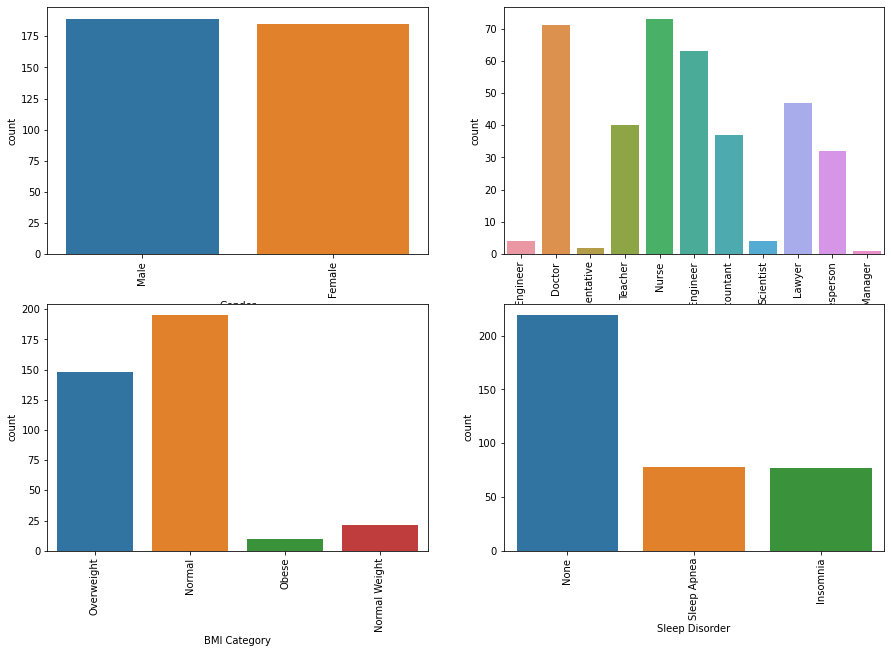

In [11]:
fig = plt.figure(figsize=(15, 10))

for i, var in enumerate(cat_col):
    plt.subplot(2,2,i+1)
    sns.countplot(x=var, data=cat_col)
    plt.xticks(rotation=90)

plt.show()

In [18]:
# As we can see in the above plot that in BMI Category we have {Overweight and Obese} same way {Normal and Normal Weight} 

df['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

In [20]:
df['BMI Category'] = df['BMI Category'].replace({'Overweight': 'Obese', 'Normal Weight': 'Normal'})
df['BMI Category'].value_counts()

Normal    216
Obese     158
Name: BMI Category, dtype: int64

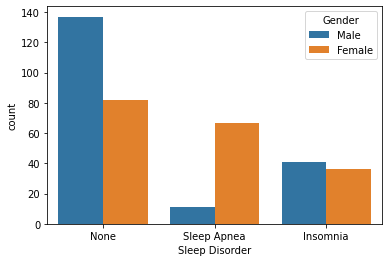

In [26]:
sns.countplot(data=df, x='Sleep Disorder', hue='Gender')

plt.show()

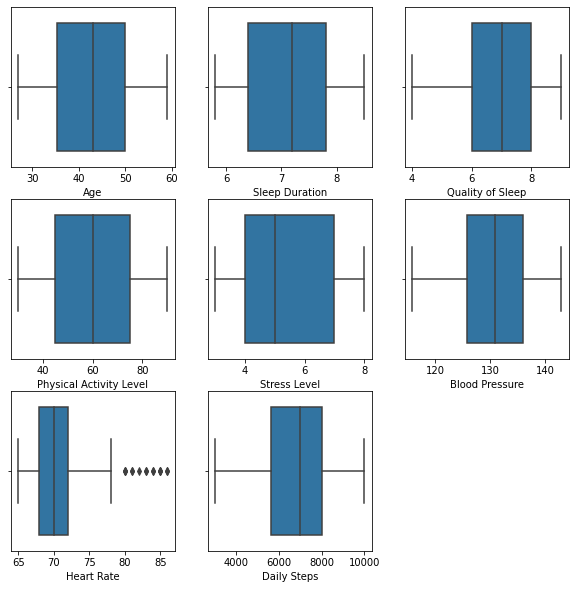

In [17]:
fig = plt.figure(figsize=(10,10))
for i, var in enumerate(num_col):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=var, data=num_col)
    plt.xticks(rotation=0)
plt.show()

/var/folders/xv/sdlvcfdd39n7b0m1rqc4dslc0000gn/T/ipykernel_10577/2005839418.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True)


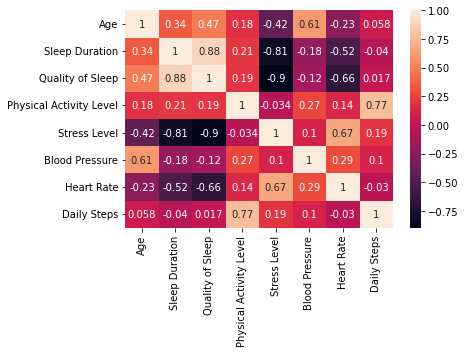

In [28]:
sns.heatmap(data=df.corr(), annot=True)
plt.show()

<AxesSubplot: xlabel='Heart Rate', ylabel='Count'>

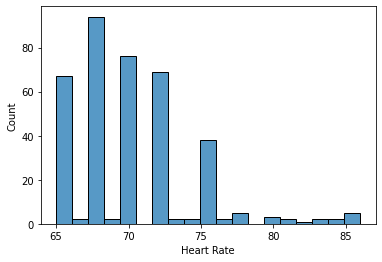

In [32]:
sns.histplot(num_col, x='Heart Rate')

## Target Analysis

In [33]:
Target = 'Sleep Disorder'

df[Target].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [40]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

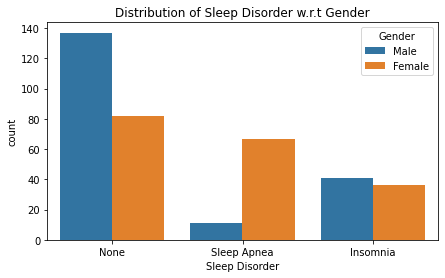

In [37]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x=Target, hue='Gender')
plt.title("Distribution of Sleep Disorder w.r.t Gender")
plt.show()

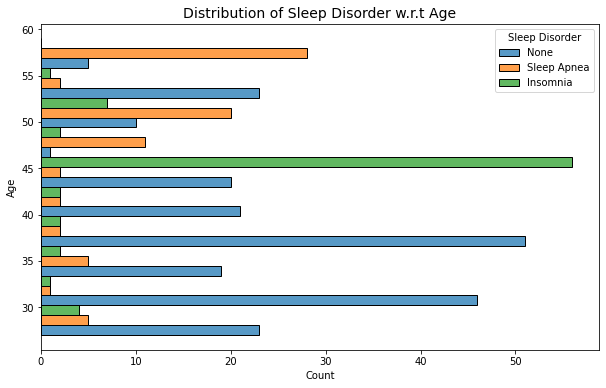

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, y='Age', hue=Target, multiple='dodge')
plt.title('Distribution of Sleep Disorder w.r.t Age', fontsize=14)
plt.show()

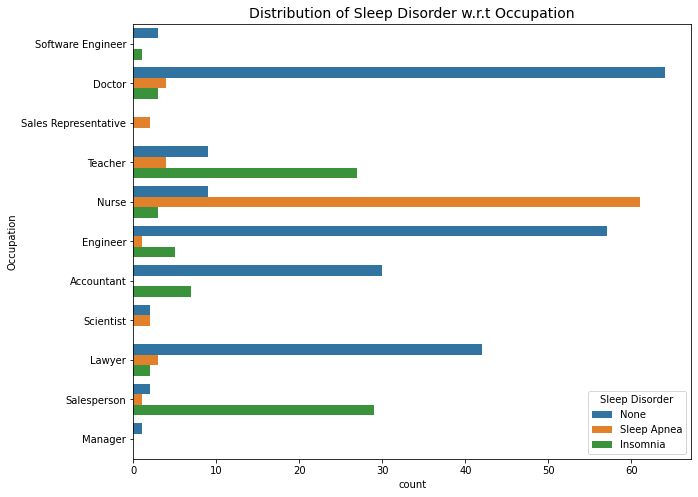

In [45]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, hue=Target, y='Occupation')
plt.title('Distribution of Sleep Disorder w.r.t Occupation', fontsize=14)
plt.show()

## Preprocessing

In [46]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Obese,126.83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125.80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125.80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140.90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140.90,85,3000,Sleep Apnea


In [54]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [59]:
from sklearn.preprocessing import LabelEncoder

labelEnc = LabelEncoder()

In [60]:
df['Occupation'] = labelEnc.fit_transform(df['Occupation'])
df['Gender'] = labelEnc.fit_transform(df['Gender'])
df['BMI Category'] = labelEnc.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = labelEnc.fit_transform(df['Sleep Disorder'])

## Train-Test Split

In [62]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,27,9,6.1,6,42,6,1,126.83,77,4200
1,1,28,1,6.2,6,60,8,0,125.80,75,10000
2,1,28,1,6.2,6,60,8,0,125.80,75,10000
3,1,28,6,5.9,4,30,8,1,140.90,85,3000
4,1,28,6,5.9,4,30,8,1,140.90,85,3000


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
y_train.shape

(299,)

In [73]:
y_test.shape

(75,)

## Model Training

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [75]:
Scaler = StandardScaler()

In [77]:
rfModel = RandomForestClassifier()

In [79]:
randomForest = Pipeline(
    steps=[
        ('Scaler', Scaler),
        ('model', rfModel)
    ]
)

In [80]:
randomForest

Pipeline(steps=[('Scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [81]:
randomForest.fit(X_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [82]:
y_pred = randomForest.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f"{accuracy_score(y_test, y_pred)} accuracy")

0.88 accuracy
